# Safety Benchmarks Performance Over Time


This notebook contains code for visualizing safety benchmark scores across different AI language models from various providers (OpenAI, Anthropic, and Meta). The visualization includes multiple safety benchmarks plotted over time, showing the progression of model performance.

Please see the README for full tables, citations, and more details.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from adjustText import adjust_text

In [2]:
color_map = {
    'OpenAI': '#4DB6AC',  
    'Anthropic': '#FF9A8B', 
    'Meta': '#4267B2'        
}

#### Variety of Safety Benchmarks Compared

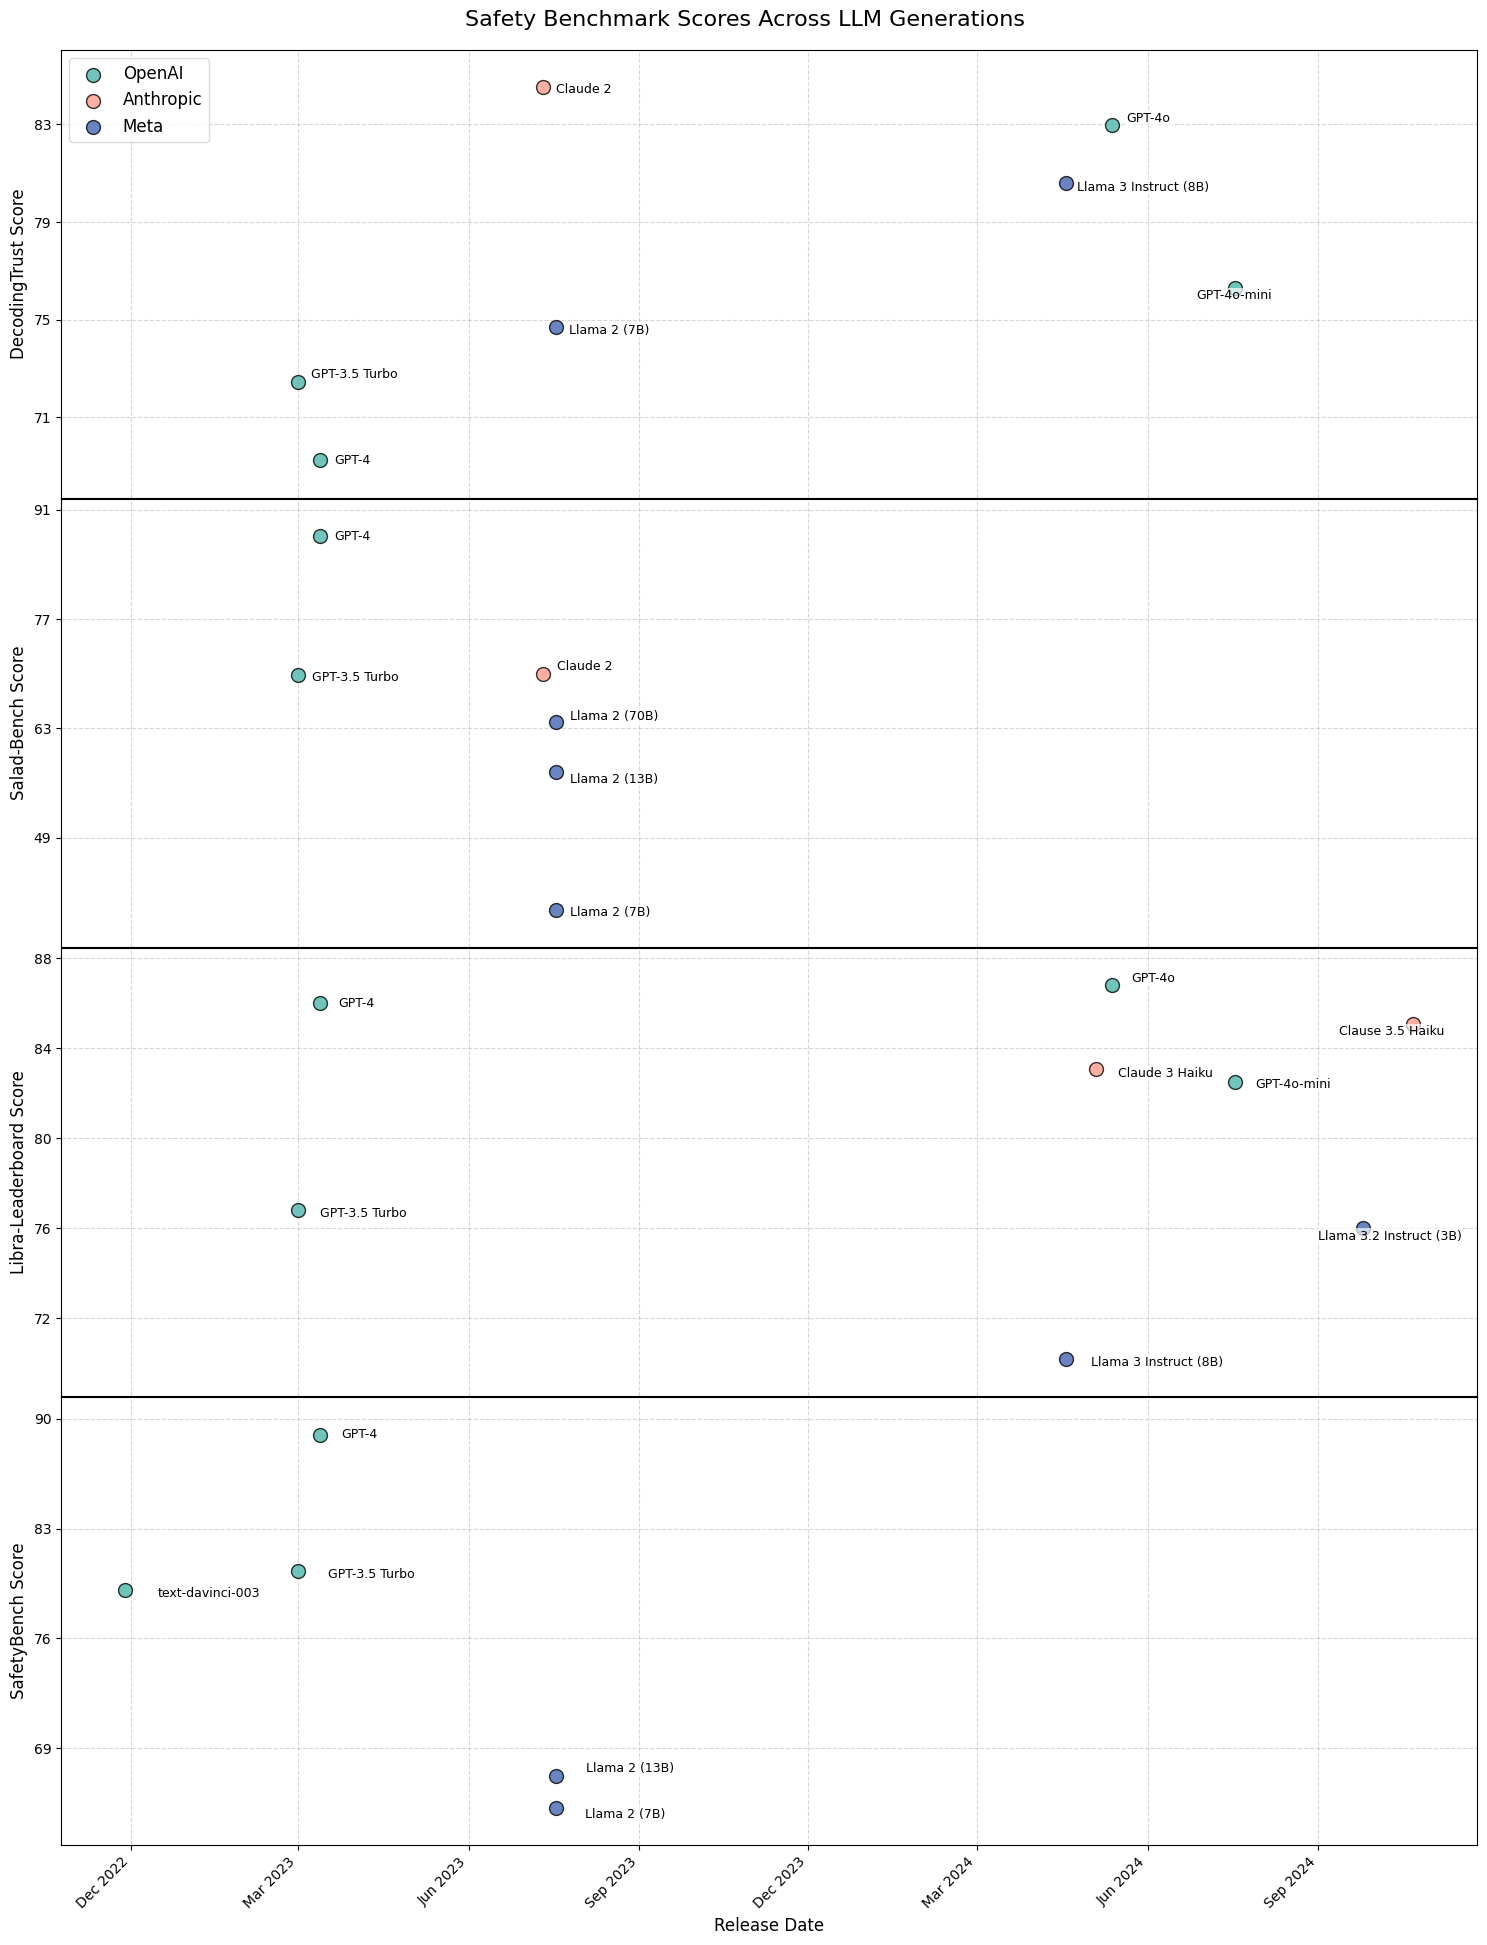

In [3]:
data = pd.read_csv('combined_safety_benchmarks.csv')
data['release date'] = pd.to_datetime(data['release date'], errors='coerce')

providers = data['provider'].unique()
benchmarks = [col for col in data.columns if col.endswith(' Score')]

fig, axs = plt.subplots(len(benchmarks), 1, figsize=(15, 20), sharex=True)
fig.subplots_adjust(hspace=0.1)  

for i, ylabel in enumerate(benchmarks):
    ax = axs[i]
  
    texts = []
    for provider in providers:
        provider_data = data[data['provider'] == provider]
        provider_data = provider_data[np.isfinite(provider_data[ylabel])]
        
        if not provider_data.empty:
            scatter = ax.scatter(
                provider_data['release date'], 
                provider_data[ylabel], 
                color=color_map[provider], 
                label=provider if i == 0 else None,  
                s=100, 
                alpha=0.8,
                edgecolor='black',
                zorder=10 
            )
            

            offset_days = 8  
            for idx, row in provider_data.iterrows():
                point_pos = (row['release date'], row[ylabel])
                text_offset = pd.Timedelta(days=offset_days)
                
                text = ax.text(
                    row['release date'] + text_offset,
                    row[ylabel],
                    row['model'],
                    fontsize=9,
                    va='center',
                    ha='left',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
                    zorder=11  
                )
                texts.append(text)
    
    adjust_text(
        texts,
        ax=ax,
    )
    
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.5, linestyle='--', zorder=0)  
    
    data_min = data[ylabel].min()
    data_max = data[ylabel].max()
    padding = (data_max - data_min) * 0.1 if data_max > data_min else 5

    ymin = max(0, data_min - padding)
    ymax = data_max + padding
    ax.set_ylim(ymin, ymax)
    
    y_range = ymax - ymin
    if y_range > 0:
        step = max(1, int(y_range / 4))  
        start = int(ymin)
        if start < ymin:
            start += step
        yticks = np.arange(start, ymax, step)
        ax.set_yticks(yticks)
        ax.set_yticklabels([f"{int(y)}" if y == int(y) else f"{y:.1f}" for y in yticks])
    
    plt.subplots_adjust(left=0.15)
    
    if i < len(benchmarks) - 1:
        ax.axhline(y=ax.get_ylim()[0], color='black', linestyle='-', linewidth=0.5, alpha=0.5)

axs[-1].set_xlabel('Release Date', fontsize=12)
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels, loc='upper left', fontsize=12, 
           frameon=True, facecolor='white', edgecolor='lightgray')

fig.suptitle('Safety Benchmark Scores Across LLM Generations', 
             fontsize=16, y=0.97)

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.003) 

# Save the figure
plt.savefig('combined_safety_benchmarks_v_time.png', dpi=300, bbox_inches='tight')
plt.show()

#### Components of HELM Safety Leaderboard Compared

6 [0.53432    0.42274511]
10 [-0.11981862  0.1017662 ]


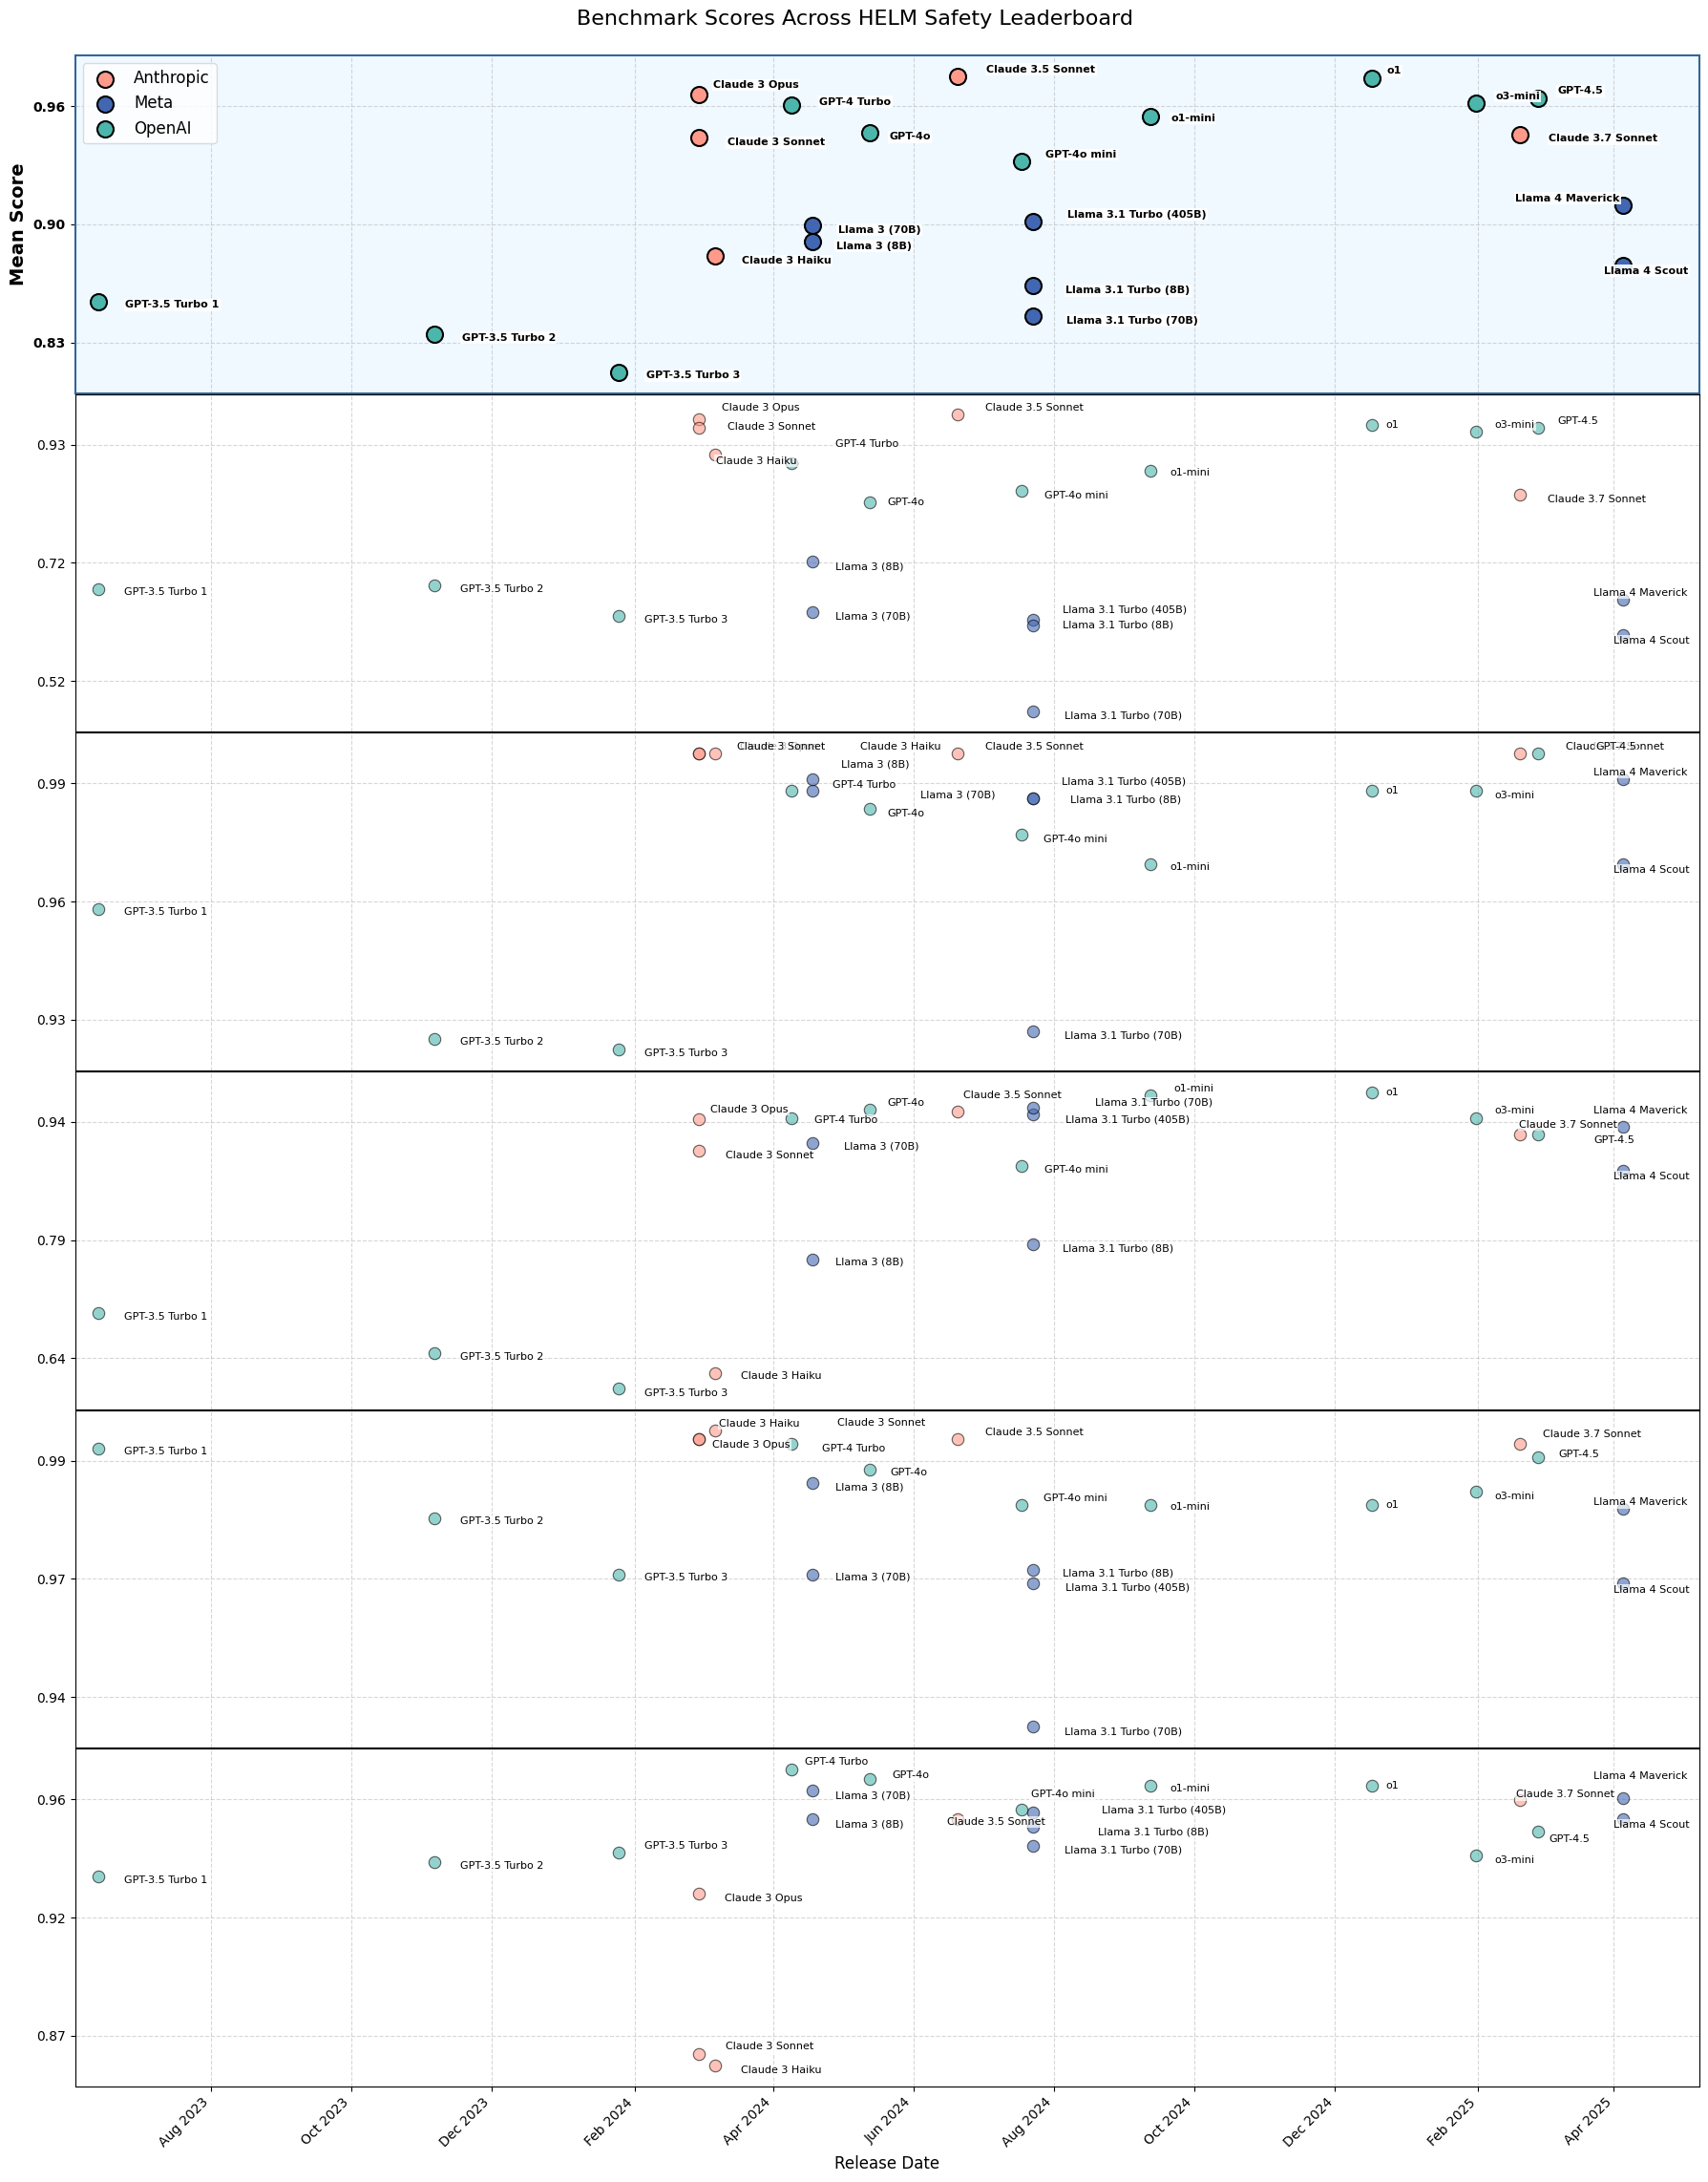

In [4]:
data = pd.read_csv('HELM_safety_leaderboard.csv')
data['snapshot date'] = pd.to_datetime(data['snapshot date'], errors='coerce')

providers = data['provider'].unique()
benchmarks = [col for col in data.columns if col.endswith(' Score')]

fig, axs = plt.subplots(len(benchmarks), 1, figsize=(18, 24), sharex=True)
fig.subplots_adjust(hspace=0.1) 

for i, ylabel in enumerate(benchmarks):
    
    ax = axs[i]
    is_mean_score = ylabel == 'Mean Score'
    
    valid_data = data.dropna(subset=[ylabel])
    if valid_data.empty:
        ax.text(0.5, 0.5, f"No data available for {ylabel}", 
                ha='center', va='center', transform=ax.transAxes)
        continue
    
    texts = []
    for provider in providers:
        provider_data = valid_data[valid_data['provider'] == provider]
        if not provider_data.empty:
            point_size = 150 if is_mean_score else 80
            point_alpha = 1.0 if is_mean_score else 0.6
            edge_width = 1.5 if is_mean_score else 0.8
            
            scatter = ax.scatter(
                provider_data['snapshot date'], 
                provider_data[ylabel], 
                color=color_map[provider], 
                label=provider if i == 0 else None,  
                s=point_size, 
                alpha=point_alpha,
                edgecolor='black',
                linewidth=edge_width,
                zorder=10  
            )
            
            offset_days = 5
            for idx, row in provider_data.iterrows():
                text_offset = pd.Timedelta(days=offset_days)
                
                fontweight = 'bold' if is_mean_score else 'normal'
                fontsize = 8 if is_mean_score else 8
                text_alpha = 0.9 if is_mean_score else 0.7
                
                text = ax.text(
                    row['snapshot date'] + text_offset,
                    row[ylabel],
                    row['model'],
                    fontsize=fontsize,
                    fontweight=fontweight,
                    va='center',
                    ha='left',
                    bbox=dict(facecolor='white', alpha=text_alpha, edgecolor='none', pad=1),
                    zorder=11 
                )
                texts.append(text)
    
    adjust_text(
        texts,
        ax=ax,
    )
    
    if is_mean_score:
        ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
        ax.set_facecolor('#f0f9ff')  
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)
            spine.set_edgecolor('#336699')

    ax.grid(True, alpha=0.5, linestyle='--', zorder=0)  
    
    data_min = valid_data[ylabel].min()
    data_max = valid_data[ylabel].max()
    
    padding = (data_max - data_min) * 0.07
    
    ymin = max(0, data_min - padding)
    ymax = min(1.02, data_max + padding)
    if data_max > 1.0:
        ymax = data_max + padding
        
    ax.set_ylim(ymin, ymax)
    
    y_range = ymax - ymin
    num_ticks = 3
    inner_padding = y_range * 0.15  
    
    tick_min = ymin + inner_padding
    tick_max = ymax - inner_padding
    
    if num_ticks > 1:
        tick_range = tick_max - tick_min
        yticks = np.linspace(tick_min, tick_max, num_ticks)
    else:
        yticks = [tick_min]
    
    yticks = [y for y in yticks if y <= 1.0]
    
    if len(yticks) == 0:
        yticks = [0.5]
    
    ax.set_yticks(yticks)
    
    if is_mean_score:
        ax.set_yticklabels([f"{y:.2f}" for y in yticks], fontweight='bold')
    else:
        ax.set_yticklabels([f"{y:.2f}" for y in yticks])
    
    if i < len(benchmarks) - 1:
        ax.axhline(y=ax.get_ylim()[0], color='black', linestyle='-', linewidth=0.5, alpha=0.5)

axs[-1].set_xlabel('Release Date', fontsize=12)
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=2)) 
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

min_date = pd.to_datetime('2023-06-03')
axs[0].set_xlim(left=min_date)

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels, loc='upper left', fontsize=12, 
           frameon=True, facecolor='white', edgecolor='lightgray')

fig.suptitle('Benchmark Scores Across HELM Safety Leaderboard', 
             fontsize=16, y=0.95)

plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.003) 

plt.savefig('HELM_safety_leaderboard_v_time.png', dpi=300, bbox_inches='tight')
plt.show()